# Предподготовка данных

In [1]:
import pandas as pd
import numpy as np

import datetime

In [2]:
df_train = pd.read_csv("data/train.csv")

In [3]:
tvr_18 = "Все 18+_TVR"
tvr_55 = "Все 55+_TVR"

share_18 = "Все 18+_Share"
share_55 = "Все 55+_Share"

df_train.columns

Index(['Unnamed: 0', 'Год', 'Месяц', 'День', 'Время', 'Канал', 'Все 18+_TVR',
       'Все 55+_TVR', 'Все 18+_Share', 'Все 55+_Share', 'Дата_День',
       'next_day', 'Дата'],
      dtype='object')

In [4]:
df_train["День"] = df_train["День"].apply(lambda x: int(x.split()[1]))

In [5]:
df_train["Канал"].value_counts()

РОССИЯ 1        14016
СТС             14016
ПЕРВЫЙ КАНАЛ    14016
ТНТ             14016
РЕН ТВ          14016
Name: Канал, dtype: int64

In [6]:
dates = np.array(df_train["Дата_День"])

df_train["day_datetime"] = df_train["Дата_День"].apply(lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"), "%Y-%m-%d"))
df_train["weekday"] = df_train["Дата_День"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S").weekday())

In [7]:
df_train

,Unnamed: 0,Год,Месяц,День,Время,Канал,Все 18+_TVR,Все 55+_TVR,Все 18+_Share,Все 55+_Share,Дата_День,next_day,Дата,day_datetime,weekday
0,0,2018,Ноябрь,1,05:00:00 - 06:00:00,ПЕРВЫЙ КАНАЛ,0.21,0.12,5.23,2.00,2018-11-01 00:00:00,False,2018-11-01 05:00:00,2018-11-01,3
1,1,2018,Ноябрь,1,06:00:00 - 07:00:00,ПЕРВЫЙ КАНАЛ,0.71,0.33,11.23,4.90,2018-11-01 00:00:00,False,2018-11-01 06:00:00,2018-11-01,3
2,2,2018,Ноябрь,1,07:00:00 - 08:00:00,ПЕРВЫЙ КАНАЛ,1.10,0.59,14.58,6.49,2018-11-01 00:00:00,False,2018-11-01 07:00:00,2018-11-01,3
3,3,2018,Ноябрь,1,08:00:00 - 09:00:00,ПЕРВЫЙ КАНАЛ,0.96,0.94,10.41,7.41,2018-11-01 00:00:00,False,2018-11-01 08:00:00,2018-11-01,3
4,4,2018,Ноябрь,1,09:00:00 - 10:00:00,ПЕРВЫЙ КАНАЛ,1.94,3.81,17.54,21.51,2018-11-01 00:00:00,False,2018-11-01 09:00:00,2018-11-01,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,87715,2020,Октябрь,31,24:00:00 - 25:00:00,ТНТ,1.17,0.39,6.08,1.65,2020-11-01 00:00:00,True,2020-11-01 00:00:00,2020-11-01,6
70076,87716,2020,Октябрь,31,25:00:00 - 26:00:00,ТНТ,0.79,0.01,6.45,0.06,2020-11-01 00:00:00,True,2020-11-01 01:00:00,2020-11-01,6
70077,87717,2020,Октябрь,31,26:00:00 - 27:00:00,ТНТ,0.04,0.03,0.53,0.28,2020-11-01 00:00:00,True,2020-11-01 02:00:00,2020-11-01,6
70078,87718,2020,Октябрь,31,27:00:00 - 28:00:00,ТНТ,0.23,0.37,4.71,5.79,2020-11-01 00:00:00,True,2020-11-01 03:00:00,2020-11-01,6


# Анализ

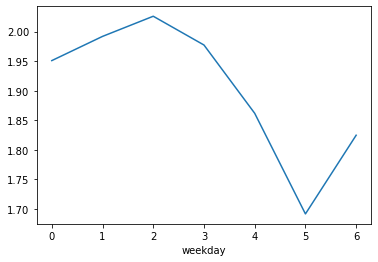

In [8]:
df_train[df_train["Канал"] == "ПЕРВЫЙ КАНАЛ"].groupby("weekday")[tvr_18].mean().plot()

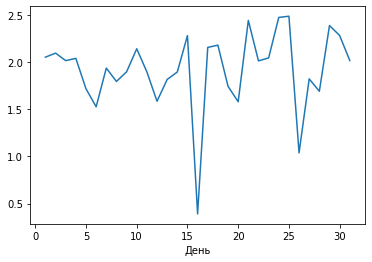

In [9]:
df_train[(df_train["Канал"] == "ПЕРВЫЙ КАНАЛ") & (df_train["Месяц"] == "Октябрь") & (df_train["Год"] == 2019)].groupby("День")[tvr_18].mean().plot()

## Данные с дополнительных источников

In [10]:
import requests
from bs4 import BeautifulSoup

### 1. Новостной сайт
Отсюда я беру суммарное количество просмотров на всех статьях за день

#### Скреппинг

In [11]:
url = "https://neftegaz.ru/archive/news/?date=01.10.2019"

request = requests.get(url)
request.ok

True

In [12]:
q = BeautifulSoup(request.text)
views_html = q.findAll("div", {"class": "views2"})

In [13]:
def int_check(x):
    try:
        int(str(x))
        return True
    except ValueError:
        return False

views = list(map(lambda x: list(map(lambda x: int(x), filter(lambda x_: int_check(x_), str(x).split("\t"))))[0], views_html))
views_sum = sum(views)
views_sum

63941

In [14]:
days = df_train["Дата_День"].apply(lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"), "%d.%m.%Y")).unique()
days

array(['01.11.2018', '03.11.2018', '04.11.2018', '06.11.2018',
       '07.11.2018', '08.11.2018', '10.11.2018', '11.11.2018',
       '12.11.2018', '13.11.2018', '14.11.2018', '16.11.2018',
       '18.11.2018', '20.11.2018', '21.11.2018', '22.11.2018',
       '23.11.2018', '25.11.2018', '26.11.2018', '27.11.2018',
       '28.11.2018', '29.11.2018', '01.12.2018', '03.12.2018',
       '04.12.2018', '05.12.2018', '06.12.2018', '08.12.2018',
       '09.12.2018', '10.12.2018', '11.12.2018', '12.12.2018',
       '13.12.2018', '14.12.2018', '15.12.2018', '17.12.2018',
       '18.12.2018', '19.12.2018', '21.12.2018', '22.12.2018',
       '23.12.2018', '24.12.2018', '25.12.2018', '27.12.2018',
       '29.12.2018', '30.12.2018', '31.12.2018', '01.01.2019',
       '02.01.2019', '03.01.2019', '04.01.2019', '05.01.2019',
       '06.01.2019', '07.01.2019', '08.01.2019', '09.01.2019',
       '11.01.2019', '12.01.2019', '13.01.2019', '14.01.2019',
       '15.01.2019', '16.01.2019', '17.01.2019', '18.01

In [15]:
views_month = []

for d in range(1, 30):
    url_ = "https://neftegaz.ru/archive/news/?date={0}.10.2020".format(str(d))
#     url_ = "https://neftegaz.ru/archive/news/?date={0}".format(str(days[dayIndex]))
    request_ = requests.get(url_)
    q_ = BeautifulSoup(request_.text)
    views_html_ = q_.findAll("div", {"class": "views2"})
    views_sum_ = sum(list(map(lambda x: list(map(lambda x: int(x), filter(lambda x_: int_check(x_), str(x).split("\t"))))[0], views_html_)))
    
    views_month.append(views_sum_)
    

#### Связь между количеством просмотров на новостном сайте и TVR на телеканале "Россия 1"

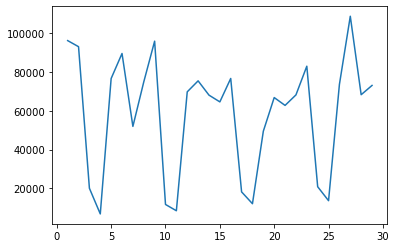

In [16]:
import matplotlib.pyplot as plt

plt.plot(range(1, 30), views_month)

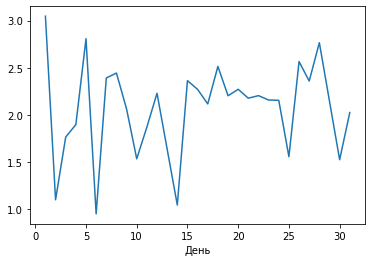

In [17]:
tvr_october2020 = df_train[(df_train["Канал"] == "РОССИЯ 1") & (df_train["Месяц"] == "Октябрь") & (df_train["Год"] == 2020)].groupby("День")[tvr_18].mean()
tvr_october2020.plot()

In [18]:
np.corrcoef(views_month, tvr_october2020)

array([[1.        , 0.09022217],
       [0.09022217, 1.        ]])

#### Сдвиг

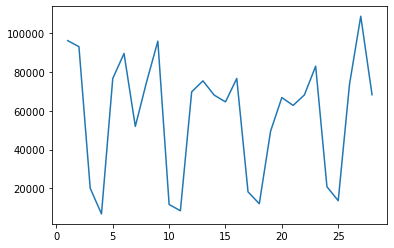

In [19]:
def make_shift_back(arr, shift = 1): # сдвиг назад
    return arr[:- shift]

def make_shift_forward(arr, shift = 1): # сдвиг вперед
    return arr[shift:]

plt.plot(range(1, 29), make_shift_back(views_month, 1))

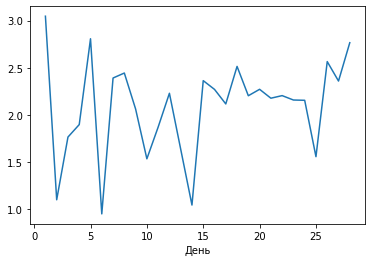

In [20]:
tvr_october2020 = df_train[(df_train["Канал"] == "РОССИЯ 1") & (df_train["Месяц"] == "Октябрь") & (df_train["Год"] == 2020)].groupby("День")[tvr_18].mean()
tvr_october2020[: -2].plot()

In [21]:
for i in range(1, 10):
    print(i, np.corrcoef(make_shift_back(views_month, i), tvr_october2020[i :]))

1 [[ 1.         -0.44677912]
 [-0.44677912  1.        ]]
2 [[1.        0.0296168]
 [0.0296168 1.       ]]
3 [[1.         0.28959644]
 [0.28959644 1.        ]]
4 [[ 1.         -0.20795726]
 [-0.20795726  1.        ]]
5 [[ 1.        -0.2197072]
 [-0.2197072  1.       ]]
6 [[1.         0.27861329]
 [0.27861329 1.        ]]
7 [[ 1.         -0.00727057]
 [-0.00727057  1.        ]]
8 [[ 1.        -0.3110055]
 [-0.3110055  1.       ]]
9 [[ 1.00000000e+00 -2.80119827e-04]
 [-2.80119827e-04  1.00000000e+00]]


#### Обработка всех дней df_train

Данные по всем днем тренировочной выборки получены с помощью скрипта get_views.py и загружены в data/news_data.txt

In [22]:
import json

all_views = {}

with open("data/news_data.txt", "r") as file:
    all_views = json.loads(file.read())

# Изменение формата дат
all_views = pd.Series(all_views)
all_views.index = list(map(lambda x: datetime.datetime.strftime(datetime.datetime.strptime(x, "%d.%m.%Y"), "%Y-%m-%d"), pd.Series(all_views).index))
all_views = all_views.to_dict()

In [23]:
df_train["news_views"] = list(map(lambda x: all_views[x], np.array(df_train["day_datetime"])))

In [24]:
df_train

,Unnamed: 0,Год,Месяц,День,Время,Канал,Все 18+_TVR,Все 55+_TVR,Все 18+_Share,Все 55+_Share,Дата_День,next_day,Дата,day_datetime,weekday,news_views
0,0,2018,Ноябрь,1,05:00:00 - 06:00:00,ПЕРВЫЙ КАНАЛ,0.21,0.12,5.23,2.00,2018-11-01 00:00:00,False,2018-11-01 05:00:00,2018-11-01,3,70884
1,1,2018,Ноябрь,1,06:00:00 - 07:00:00,ПЕРВЫЙ КАНАЛ,0.71,0.33,11.23,4.90,2018-11-01 00:00:00,False,2018-11-01 06:00:00,2018-11-01,3,70884
2,2,2018,Ноябрь,1,07:00:00 - 08:00:00,ПЕРВЫЙ КАНАЛ,1.10,0.59,14.58,6.49,2018-11-01 00:00:00,False,2018-11-01 07:00:00,2018-11-01,3,70884
3,3,2018,Ноябрь,1,08:00:00 - 09:00:00,ПЕРВЫЙ КАНАЛ,0.96,0.94,10.41,7.41,2018-11-01 00:00:00,False,2018-11-01 08:00:00,2018-11-01,3,70884
4,4,2018,Ноябрь,1,09:00:00 - 10:00:00,ПЕРВЫЙ КАНАЛ,1.94,3.81,17.54,21.51,2018-11-01 00:00:00,False,2018-11-01 09:00:00,2018-11-01,3,70884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,87715,2020,Октябрь,31,24:00:00 - 25:00:00,ТНТ,1.17,0.39,6.08,1.65,2020-11-01 00:00:00,True,2020-11-01 00:00:00,2020-11-01,6,10911
70076,87716,2020,Октябрь,31,25:00:00 - 26:00:00,ТНТ,0.79,0.01,6.45,0.06,2020-11-01 00:00:00,True,2020-11-01 01:00:00,2020-11-01,6,10911
70077,87717,2020,Октябрь,31,26:00:00 - 27:00:00,ТНТ,0.04,0.03,0.53,0.28,2020-11-01 00:00:00,True,2020-11-01 02:00:00,2020-11-01,6,10911
70078,87718,2020,Октябрь,31,27:00:00 - 28:00:00,ТНТ,0.23,0.37,4.71,5.79,2020-11-01 00:00:00,True,2020-11-01 03:00:00,2020-11-01,6,10911


In [25]:
news_views_r1 = df_train[df_train["Канал"] == "РОССИЯ 1"]["news_views"]
tvr_r1 = df_train[df_train["Канал"] == "РОССИЯ 1"][tvr_18]
np.corrcoef(news_views_r1, tvr_r1) # базовая корреляция

array([[1.        , 0.12906197],
       [0.12906197, 1.        ]])

In [26]:
for i in range(1, 7):
    print("---Shift: {0}---".format(i))
    print("Back shift correlation:\n {1}".format(i, np.corrcoef(make_shift_back(news_views_r1, i), tvr_r1[i :])))
    print("Forward shift correlation:\n {1}".format(i, np.corrcoef(make_shift_forward(news_views_r1, i), tvr_r1[: -i])))

---Shift: 1---
Back shift correlation:
 [[1.         0.12207634]
 [0.12207634 1.        ]]
Forward shift correlation:
 [[1.         0.13186702]
 [0.13186702 1.        ]]
---Shift: 2---
Back shift correlation:
 [[1.         0.11830992]
 [0.11830992 1.        ]]
Forward shift correlation:
 [[1.         0.13291738]
 [0.13291738 1.        ]]
---Shift: 3---
Back shift correlation:
 [[1.         0.11894313]
 [0.11894313 1.        ]]
Forward shift correlation:
 [[1.         0.13683708]
 [0.13683708 1.        ]]
---Shift: 4---
Back shift correlation:
 [[1.         0.12087597]
 [0.12087597 1.        ]]
Forward shift correlation:
 [[1.         0.13373749]
 [0.13373749 1.        ]]
---Shift: 5---
Back shift correlation:
 [[1.         0.12240844]
 [0.12240844 1.        ]]
Forward shift correlation:
 [[1.         0.12854264]
 [0.12854264 1.        ]]
---Shift: 6---
Back shift correlation:
 [[1.         0.12095197]
 [0.12095197 1.        ]]
Forward shift correlation:
 [[1.         0.12790146]
 [0.12

In [27]:
df_train["news_views_shift"] = make_shift_forward(df_train["news_views"], 3)

In [28]:
df_train

,Unnamed: 0,Год,Месяц,День,Время,Канал,Все 18+_TVR,Все 55+_TVR,Все 18+_Share,Все 55+_Share,Дата_День,next_day,Дата,day_datetime,weekday,news_views,news_views_shift
0,0,2018,Ноябрь,1,05:00:00 - 06:00:00,ПЕРВЫЙ КАНАЛ,0.21,0.12,5.23,2.00,2018-11-01 00:00:00,False,2018-11-01 05:00:00,2018-11-01,3,70884,NaN
1,1,2018,Ноябрь,1,06:00:00 - 07:00:00,ПЕРВЫЙ КАНАЛ,0.71,0.33,11.23,4.90,2018-11-01 00:00:00,False,2018-11-01 06:00:00,2018-11-01,3,70884,NaN
2,2,2018,Ноябрь,1,07:00:00 - 08:00:00,ПЕРВЫЙ КАНАЛ,1.10,0.59,14.58,6.49,2018-11-01 00:00:00,False,2018-11-01 07:00:00,2018-11-01,3,70884,NaN
3,3,2018,Ноябрь,1,08:00:00 - 09:00:00,ПЕРВЫЙ КАНАЛ,0.96,0.94,10.41,7.41,2018-11-01 00:00:00,False,2018-11-01 08:00:00,2018-11-01,3,70884,70884.0
4,4,2018,Ноябрь,1,09:00:00 - 10:00:00,ПЕРВЫЙ КАНАЛ,1.94,3.81,17.54,21.51,2018-11-01 00:00:00,False,2018-11-01 09:00:00,2018-11-01,3,70884,70884.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,87715,2020,Октябрь,31,24:00:00 - 25:00:00,ТНТ,1.17,0.39,6.08,1.65,2020-11-01 00:00:00,True,2020-11-01 00:00:00,2020-11-01,6,10911,10911.0
70076,87716,2020,Октябрь,31,25:00:00 - 26:00:00,ТНТ,0.79,0.01,6.45,0.06,2020-11-01 00:00:00,True,2020-11-01 01:00:00,2020-11-01,6,10911,10911.0
70077,87717,2020,Октябрь,31,26:00:00 - 27:00:00,ТНТ,0.04,0.03,0.53,0.28,2020-11-01 00:00:00,True,2020-11-01 02:00:00,2020-11-01,6,10911,10911.0
70078,87718,2020,Октябрь,31,27:00:00 - 28:00:00,ТНТ,0.23,0.37,4.71,5.79,2020-11-01 00:00:00,True,2020-11-01 03:00:00,2020-11-01,6,10911,10911.0


Лучший сдвиг - сдвиг вперед на 3 дня

### 2. Погода

#### Скреппинг

In [29]:
from selenium import webdriver
import time

driver = webdriver.Chrome(executable_path = "/home/egoluback/Documents/NTI/2_stage/ML/2_stage/task2/scrapping/chromedriver")

In [30]:
url_meteopost = "https://www.gismeteo.ru/diary/4079/"

driver.get(url_meteopost)

In [31]:
driver.find_element_by_xpath("//select[@name = 'sd_distr']/option[text() = 'Москва (город федерального значения)']").click()

driver.find_element_by_xpath("//select[@name = 'Month']/option[text() = 'Октябрь']").click()

driver.find_element_by_xpath("//select[@name = 'Year']/option[text() = '2018']").click()

driver.find_element_by_xpath("//select[@name = 'sd_city']/option[text() = 'Москва']").click()

driver.find_element_by_xpath("//button[@id = 'selector_go_btn']").click()

In [32]:
weather_pd = pd.read_html(driver.find_element_by_xpath('//table').get_attribute('outerHTML'))[0]

In [33]:
temp_day = pd.Series(weather_pd['День']['Температура'], name = "temp_day")
temp_night = pd.Series(weather_pd['Вечер']['Температура'], name = "temp_night")

result_temp = pd.merge(temp_day, temp_night, right_index = True, left_index = True)

result_temp

,temp_day,temp_night
0,14,8
1,10,9
2,10,8
3,7,6
4,7,6
5,13,12
6,16,15
7,7,1
8,9,6
9,13,12


Данные по всем днем тренировочной выборки получены с помощью скрипта get_weather_gismeteo.py и загружены в data/weather_data.txt

In [34]:
weather_data = []

with open("data/weather_data.txt", "rb") as file:
    weather_data = json.loads(file.read())

Подсчет nan'ов

In [35]:
dataset_Moscow = pd.DataFrame(weather_data["Москва"])

for elIndex in range(len(list(dataset_Moscow[2]))):
    nans_sum_night = np.isnan(np.array(list(list(dataset_Moscow[2])[elIndex]["temp_night"].values()))).sum()
    nans_sum_day = np.isnan(np.array(list(list(dataset_Moscow[2])[elIndex]["temp_day"].values()))).sum()
    if ((nans_sum_day + nans_sum_night) > 0):
        print("---nans detected---")
        print("Summary: {0}".format(nans_sum_day + nans_sum_night))
        print("Year: {0}; Month: {1}.".format(dataset_Moscow[0][elIndex], dataset_Moscow[1][elIndex]))

---nans detected---
Summary: 1
Year: 2018; Month: 4.
---nans detected---
Summary: 1
Year: 2018; Month: 9.
---nans detected---
Summary: 2
Year: 2019; Month: 7.
---nans detected---
Summary: 1
Year: 2020; Month: 5.
---nans detected---
Summary: 1
Year: 2020; Month: 7.


In [36]:
def time_check(hour):
    if (hour >= 9 and hour <= 17): return "day"
    else: return "night"

days_time = df_train["Дата"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

days_daytime = pd.Series(days_time.apply(lambda x: time_check(x.hour)), name = "time")

days_year = pd.Series(days_time.apply(lambda x: x.year), name = "year")
days_month = pd.Series(days_time.apply(lambda x: x.month), name = "month")
days_day = pd.Series(days_time.apply(lambda x: x.day), name = "day")

days_ymd = pd.merge(pd.merge(days_year, days_month, right_index = True, left_index = True), days_day, right_index = True, left_index = True)

days_full = pd.merge(days_ymd, days_daytime, right_index = True, left_index = True)

days_full["temp"] = np.empty(len(days_full["year"]))

days_full["temp"][:] = np.nan

days_full

<ipython-input-36-79bbcbe6f75a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_full["temp"][:] = np.nan


,year,month,day,time,temp
0,2018,11,1,night,NaN
1,2018,11,1,night,NaN
2,2018,11,1,night,NaN
3,2018,11,1,night,NaN
4,2018,11,1,day,NaN
...,...,...,...,...,...
70075,2020,11,1,night,NaN
70076,2020,11,1,night,NaN
70077,2020,11,1,night,NaN
70078,2020,11,1,night,NaN


In [37]:
weather_Moscow = pd.DataFrame(weather_data["Москва"])

days_full_Moscow = days_full.copy()

for year in [2018, 2019, 2020]:
    for monthIndex in range(12):
        temp_df = pd.DataFrame(weather_Moscow[(weather_Moscow[0] == year) & (weather_Moscow[1] == monthIndex + 1)][2].iloc[0])
        days_this = days_full_Moscow[(days_full_Moscow["year"] == year) & (days_full_Moscow["month"] == monthIndex + 1)]
        if (len(days_this) != 0):
            for day in set(days_this["day"]):
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "night"), "temp"] = temp_df.iloc[day - 1]["temp_night"]
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "day"), "temp"] = temp_df.iloc[day - 1]["temp_day"]
        days_full_Moscow[(days_full_Moscow["year"] == year) & (days_full_Moscow["month"] == monthIndex + 1)] = days_this

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [38]:
days_full_Moscow["temp"] = days_full_Moscow["temp"].fillna(method = "ffill")
df_train["temp_Moscow"] = days_full_Moscow["temp"]

In [39]:
weather_Peter = pd.DataFrame(weather_data["Санкт-Петербург"])

days_full_Peter = days_full.copy()

for year in [2018, 2019, 2020]:
    for monthIndex in range(12):
        temp_df = pd.DataFrame(weather_Peter[(weather_Peter[0] == year) & (weather_Peter[1] == monthIndex + 1)][2].iloc[0])
        days_this = days_full_Peter[(days_full_Peter["year"] == year) & (days_full_Peter["month"] == monthIndex + 1)]
        if (len(days_this) != 0):
            for day in set(days_this["day"]):
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "night"), "temp"] = temp_df.iloc[day - 1]["temp_night"]
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "day"), "temp"] = temp_df.iloc[day - 1]["temp_day"]
        days_full_Peter[(days_full_Peter["year"] == year) & (days_full_Peter["month"] == monthIndex + 1)] = days_this

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [40]:
days_full_Peter["temp"] = days_full_Peter["temp"].fillna(method = "ffill")
df_train["temp_Peter"] = days_full_Peter["temp"]

In [41]:
weather_Novosib = pd.DataFrame(weather_data["Новосибирск"])

days_full_Novosib = days_full.copy()

for year in [2018, 2019, 2020]:
    for monthIndex in range(12):
        temp_df = pd.DataFrame(weather_Novosib[(weather_Novosib[0] == year) & (weather_Novosib[1] == monthIndex + 1)][2].iloc[0])
        days_this = days_full_Novosib[(days_full_Novosib["year"] == year) & (days_full_Novosib["month"] == monthIndex + 1)]
        if (len(days_this) != 0):
            for day in set(days_this["day"]):
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "night"), "temp"] = temp_df.iloc[day - 1]["temp_night"]
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "day"), "temp"] = temp_df.iloc[day - 1]["temp_day"]
        days_full_Novosib[(days_full_Novosib["year"] == year) & (days_full_Novosib["month"] == monthIndex + 1)] = days_this

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [42]:
days_full_Novosib["temp"] = days_full_Novosib["temp"].fillna(method = "ffill")
df_train["temp_Novosib"] = days_full_Novosib["temp"]

In [43]:
weather_Ekb = pd.DataFrame(weather_data["Екатеринбург"])

days_full_Ekb = days_full.copy()

for year in [2018, 2019, 2020]:
    for monthIndex in range(12):
        temp_df = pd.DataFrame(weather_Ekb[(weather_Ekb[0] == year) & (weather_Ekb[1] == monthIndex + 1)][2].iloc[0])
        days_this = days_full_Ekb[(days_full_Ekb["year"] == year) & (days_full_Ekb["month"] == monthIndex + 1)]
        if (len(days_this) != 0):
            for day in set(days_this["day"]):
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "night"), "temp"] = temp_df.iloc[day - 1]["temp_night"]
                days_this.loc[(days_this["day"] == day) & (days_this["time"] == "day"), "temp"] = temp_df.iloc[day - 1]["temp_day"]
        days_full[(days_full_Ekb["year"] == year) & (days_full_Ekb["month"] == monthIndex + 1)] = days_this

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [44]:
days_full_Ekb["temp"] = days_full_Ekb["temp"].fillna(method = "ffill")
df_train["temp_Ekb"] = days_full_Ekb["temp"]

In [45]:
df_train[df_train.columns[15:]]

,news_views,news_views_shift,temp_Moscow,temp_Peter,temp_Novosib,temp_Ekb
0,70884,NaN,5.0,8.0,-7.0,NaN
1,70884,NaN,5.0,8.0,-7.0,NaN
2,70884,NaN,5.0,8.0,-7.0,NaN
3,70884,70884.0,5.0,8.0,-7.0,NaN
4,70884,70884.0,5.0,10.0,-7.0,NaN
...,...,...,...,...,...,...
70075,10911,10911.0,4.0,0.0,2.0,NaN
70076,10911,10911.0,4.0,0.0,2.0,NaN
70077,10911,10911.0,4.0,0.0,2.0,NaN
70078,10911,10911.0,4.0,0.0,2.0,NaN


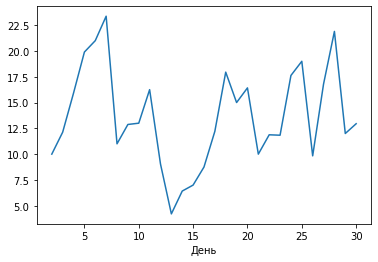

In [46]:
data_month = df_train[(df_train["Канал"] == "СТС") & (df_train["Месяц"] == "Май") & (df_train["Год"] == 2019)].groupby("День")
data_month["temp_Novosib"].mean().plot()

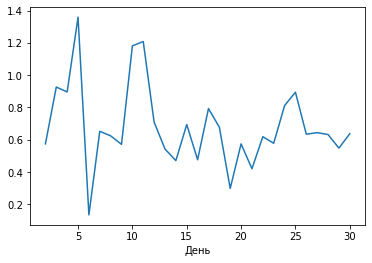

In [47]:
data_month[tvr_18].mean().plot()

In [48]:
np.corrcoef(data_month["temp_Novosib"].mean(), data_month[tvr_18].mean())

array([[1.       , 0.2067084],
       [0.2067084, 1.       ]])

### 3. Поисковые запросы

In [49]:
df_wo_init = pd.read_csv("data/searches/searches_wo.csv")

df_wo = pd.DataFrame(np.array([list(df_wo_init["Категория: Все категории"].index)[1 :], list(df_wo_init["Категория: Все категории"])[1 :]]).T, columns = ["week", "searches"])
df_wo

,week,searches
0,2018-01-07,100
1,2018-01-14,93
2,2018-01-21,95
3,2018-01-28,93
4,2018-02-04,92
...,...,...
151,2020-11-29,55
152,2020-12-06,54
153,2020-12-13,54
154,2020-12-20,50


In [50]:
weeks_time = df_wo["week"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

weeks_year = pd.Series(weeks_time.apply(lambda x: x.year), name = "year")
weeks_month = pd.Series(weeks_time.apply(lambda x: x.month), name = "month")
weeks_day = pd.Series(weeks_time.apply(lambda x: x.day), name = "day")

weeks_ymd = pd.merge(pd.merge(weeks_year, weeks_month, right_index = True, left_index = True), weeks_day, right_index = True, left_index = True)

df_wo = pd.merge(df_wo, weeks_ymd, right_index = True, left_index = True)

df_wo

,week,searches,year,month,day
0,2018-01-07,100,2018,1,7
1,2018-01-14,93,2018,1,14
2,2018-01-21,95,2018,1,21
3,2018-01-28,93,2018,1,28
4,2018-02-04,92,2018,2,4
...,...,...,...,...,...
151,2020-11-29,55,2020,11,29
152,2020-12-06,54,2020,12,6
153,2020-12-13,54,2020,12,13
154,2020-12-20,50,2020,12,20


In [51]:
datas_searches = pd.DataFrame(pd.date_range(start = "2018-01-01", end = "2021-01-01"), columns = ["date"])

datas_searches["searches"] = np.empty(len(datas_searches["date"]))
datas_searches["searches"][:] = np.nan

<ipython-input-51-860ce42ecf18>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_searches["searches"][:] = np.nan


In [52]:
current_searches = df_wo["searches"][0]

for dataIndex in range(len(list(datas_searches["date"]))):
    date_str = datetime.datetime.strftime(datas_searches["date"].iloc[dataIndex], "%Y-%m-%d")
    
    if (len(df_wo[df_wo["week"] == date_str]) > 0):
        current_searches = df_wo[df_wo["week"] == date_str]["searches"]  
        
    datas_searches["searches"][dataIndex] = current_searches

<ipython-input-52-822764c10fc2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas_searches["searches"][dataIndex] = current_searches


In [53]:
# datas_searches["date"] = datas_searches["date"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d"))

datas_searches

,date,searches
0,2018-01-01,100.0
1,2018-01-02,100.0
2,2018-01-03,100.0
3,2018-01-04,100.0
4,2018-01-05,100.0
...,...,...
1092,2020-12-28,63.0
1093,2020-12-29,63.0
1094,2020-12-30,63.0
1095,2020-12-31,63.0


In [54]:
days_time = df_train["Дата"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

days_year = pd.Series(days_time.apply(lambda x: x.year), name = "year")
days_month = pd.Series(days_time.apply(lambda x: x.month), name = "month")
days_day = pd.Series(days_time.apply(lambda x: x.day), name = "day")

days_fullymd = pd.merge(pd.merge(days_year, days_month, right_index = True, left_index = True), days_day, right_index = True, left_index = True)

days_fullymd["searches"] = np.empty(len(days_fullymd["year"]))
days_fullymd["searches"][:] = np.nan


datas_searches["year"] = pd.Series(datas_searches["date"].apply(lambda x: x.year), name = "year")
datas_searches["month"] = pd.Series(datas_searches["date"].apply(lambda x: x.month), name = "month")
datas_searches["day"] = pd.Series(datas_searches["date"].apply(lambda x: x.day), name = "day")

days_fullymd, datas_searches

<ipython-input-54-3555e9242306>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_fullymd["searches"][:] = np.nan


(       year  month  day  searches
 0      2018     11    1       NaN
 1      2018     11    1       NaN
 2      2018     11    1       NaN
 3      2018     11    1       NaN
 4      2018     11    1       NaN
 ...     ...    ...  ...       ...
 70075  2020     11    1       NaN
 70076  2020     11    1       NaN
 70077  2020     11    1       NaN
 70078  2020     11    1       NaN
 70079  2020     11    1       NaN
 
 [70080 rows x 4 columns],
            date  searches  year  month  day
 0    2018-01-01     100.0  2018      1    1
 1    2018-01-02     100.0  2018      1    2
 2    2018-01-03     100.0  2018      1    3
 3    2018-01-04     100.0  2018      1    4
 4    2018-01-05     100.0  2018      1    5
 ...         ...       ...   ...    ...  ...
 1092 2020-12-28      63.0  2020     12   28
 1093 2020-12-29      63.0  2020     12   29
 1094 2020-12-30      63.0  2020     12   30
 1095 2020-12-31      63.0  2020     12   31
 1096 2021-01-01      63.0  2021      1    1
 
 [1097 ro

In [55]:
for year in [2018, 2019, 2020]:
    for monthIndex in range(12):
        searches_df = datas_searches[(datas_searches["year"] == year) & (datas_searches["month"] == monthIndex + 1)]
        days_this = days_fullymd[(days_fullymd["year"] == year) & (days_fullymd["month"] == monthIndex + 1)]
        if (len(days_this) != 0):
            for day in set(days_this["day"]):
                searches_ = searches_df.loc[searches_df["day"] == day, "searches"]
                if (len(searches_) == 0): continue
                print(searches_df.loc[searches_df["day"] == day, "searches"])
                days_this.loc[days_this["day"] == day, "searches"] = list(searches_)[0]
        days_fullymd[(days_fullymd["year"] == year) & (days_fullymd["month"] == monthIndex + 1)] = days_this


/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

304    81.0
Name: searches, dtype: float64
306    81.0
Name: searches, dtype: float64
307    82.0
Name: searches, dtype: float64
309    82.0
Name: searches, dtype: float64
310    82.0
Name: searches, dtype: float64
311    82.0
Name: searches, dtype: float64
313    82.0
Name: searches, dtype: float64
314    80.0
Name: searches, dtype: float64
315    80.0
Name: searches, dtype: float64
316    80.0
Name: searches, dtype: float64
317    80.0
Name: searches, dtype: float64
319    80.0
Name: searches, dtype: float64
321    69.0
Name: searches, dtype: float64
323    69.0
Name: searches, dtype: float64
324    69.0
Name: searches, dtype: float64
325    69.0
Name: searches, dtype: float64
326    69.0
Name: searches, dtype: float64
328    71.0
Name: searches, dtype: float64
329    71.0
Name: searches, dtype: float64
330    71.0
Name: searches, dtype: float64
331    71.0
Name: searches, dtype: float64
332    71.0
Name: searches, dtype: float64
334    71.0
Name: searches, dtype: float64
336    72.0

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

446    65.0
Name: searches, dtype: float64
447    69.0
Name: searches, dtype: float64
449    69.0
Name: searches, dtype: float64
450    69.0
Name: searches, dtype: float64
452    69.0
Name: searches, dtype: float64
453    69.0
Name: searches, dtype: float64
454    65.0
Name: searches, dtype: float64
455    65.0
Name: searches, dtype: float64
458    65.0
Name: searches, dtype: float64
459    65.0
Name: searches, dtype: float64
460    65.0
Name: searches, dtype: float64
461    59.0
Name: searches, dtype: float64
462    59.0
Name: searches, dtype: float64
463    59.0
Name: searches, dtype: float64
464    59.0
Name: searches, dtype: float64
466    59.0
Name: searches, dtype: float64
467    59.0
Name: searches, dtype: float64
468    73.0
Name: searches, dtype: float64
470    73.0
Name: searches, dtype: float64
471    73.0
Name: searches, dtype: float64
472    73.0
Name: searches, dtype: float64
473    73.0
Name: searches, dtype: float64
474    73.0
Name: searches, dtype: float64
476    62.0

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

597    60.0
Name: searches, dtype: float64
598    60.0
Name: searches, dtype: float64
599    60.0
Name: searches, dtype: float64
600    60.0
Name: searches, dtype: float64
601    60.0
Name: searches, dtype: float64
602    60.0
Name: searches, dtype: float64
603    60.0
Name: searches, dtype: float64
604    60.0
Name: searches, dtype: float64
605    60.0
Name: searches, dtype: float64
606    60.0
Name: searches, dtype: float64
608    59.0
Name: searches, dtype: float64
609    59.0
Name: searches, dtype: float64
610    59.0
Name: searches, dtype: float64
611    59.0
Name: searches, dtype: float64
612    59.0
Name: searches, dtype: float64
613    59.0
Name: searches, dtype: float64
614    59.0
Name: searches, dtype: float64
615    53.0
Name: searches, dtype: float64
616    53.0
Name: searches, dtype: float64
618    53.0
Name: searches, dtype: float64
619    53.0
Name: searches, dtype: float64
620    53.0
Name: searches, dtype: float64
622    57.0
Name: searches, dtype: float64
624    57.0

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

744    62.0
Name: searches, dtype: float64
745    62.0
Name: searches, dtype: float64
747    62.0
Name: searches, dtype: float64
748    64.0
Name: searches, dtype: float64
749    64.0
Name: searches, dtype: float64
750    64.0
Name: searches, dtype: float64
752    64.0
Name: searches, dtype: float64
753    64.0
Name: searches, dtype: float64
754    64.0
Name: searches, dtype: float64
756    60.0
Name: searches, dtype: float64
757    60.0
Name: searches, dtype: float64
758    60.0
Name: searches, dtype: float64
759    60.0
Name: searches, dtype: float64
760    60.0
Name: searches, dtype: float64
762    63.0
Name: searches, dtype: float64
763    63.0
Name: searches, dtype: float64
764    63.0
Name: searches, dtype: float64
766    63.0
Name: searches, dtype: float64
767    63.0
Name: searches, dtype: float64
768    63.0
Name: searches, dtype: float64
769    64.0
Name: searches, dtype: float64
770    64.0
Name: searches, dtype: float64
771    64.0
Name: searches, dtype: float64
772    64.0

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

901    51.0
Name: searches, dtype: float64
902    51.0
Name: searches, dtype: float64
903    51.0
Name: searches, dtype: float64
904    51.0
Name: searches, dtype: float64
905    51.0
Name: searches, dtype: float64
906    51.0
Name: searches, dtype: float64
907    51.0
Name: searches, dtype: float64
908    51.0
Name: searches, dtype: float64
910    50.0
Name: searches, dtype: float64
911    50.0
Name: searches, dtype: float64
914    50.0
Name: searches, dtype: float64
915    50.0
Name: searches, dtype: float64
916    48.0
Name: searches, dtype: float64
917    48.0
Name: searches, dtype: float64
918    48.0
Name: searches, dtype: float64
920    48.0
Name: searches, dtype: float64
921    48.0
Name: searches, dtype: float64
923    50.0
Name: searches, dtype: float64
924    50.0
Name: searches, dtype: float64
925    50.0
Name: searches, dtype: float64
926    50.0
Name: searches, dtype: float64
927    50.0
Name: searches, dtype: float64
928    50.0
Name: searches, dtype: float64
929    50.0

/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [56]:
df_train["searches"] = days_fullymd["searches"]

#### Загрузка всех датасетов с поисковыми запросами
Файл получен с помощью скрипта get_searches.py

In [57]:
df_searches = pd.read_csv("data/searches_full.csv")

df_train = pd.merge(df_train, df_searches)

df_train

,Unnamed: 0,Год,Месяц,День,Время,Канал,Все 18+_TVR,Все 55+_TVR,Все 18+_Share,Все 55+_Share,...,temp_Peter,temp_Novosib,temp_Ekb,searches,searches_wo,searches_tnt,searches_1st,searches_r1,searches_sts,searches_news
0,0,2018,Ноябрь,1,05:00:00 - 06:00:00,ПЕРВЫЙ КАНАЛ,0.21,0.12,5.23,2.00,...,8.0,-7.0,NaN,81.0,81.0,71.0,26.0,15.0,74.0,36.0
1,1,2018,Ноябрь,1,06:00:00 - 07:00:00,ПЕРВЫЙ КАНАЛ,0.71,0.33,11.23,4.90,...,8.0,-7.0,NaN,81.0,81.0,71.0,26.0,15.0,74.0,36.0
2,2,2018,Ноябрь,1,07:00:00 - 08:00:00,ПЕРВЫЙ КАНАЛ,1.10,0.59,14.58,6.49,...,8.0,-7.0,NaN,81.0,81.0,71.0,26.0,15.0,74.0,36.0
3,3,2018,Ноябрь,1,08:00:00 - 09:00:00,ПЕРВЫЙ КАНАЛ,0.96,0.94,10.41,7.41,...,8.0,-7.0,NaN,81.0,81.0,71.0,26.0,15.0,74.0,36.0
4,4,2018,Ноябрь,1,09:00:00 - 10:00:00,ПЕРВЫЙ КАНАЛ,1.94,3.81,17.54,21.51,...,10.0,-7.0,NaN,81.0,81.0,71.0,26.0,15.0,74.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55795,70075,2020,Июнь,6,24:00:00 - 25:00:00,ТНТ,0.85,0.60,4.78,2.51,...,21.0,21.0,NaN,54.0,60.0,43.0,13.0,19.0,71.0,42.0
55796,70076,2020,Июнь,6,25:00:00 - 26:00:00,ТНТ,0.14,0.05,1.23,0.33,...,21.0,21.0,NaN,54.0,60.0,43.0,13.0,19.0,71.0,42.0
55797,70077,2020,Июнь,6,26:00:00 - 27:00:00,ТНТ,0.19,0.02,3.25,0.23,...,21.0,21.0,NaN,54.0,60.0,43.0,13.0,19.0,71.0,42.0
55798,70078,2020,Июнь,6,27:00:00 - 28:00:00,ТНТ,0.23,0.17,6.00,3.09,...,21.0,21.0,NaN,54.0,60.0,43.0,13.0,19.0,71.0,42.0


Я получил данные по следующим поисковым запросам:
1. Просто названия каналов(на случай, если кто-то хочет посмотреть их в интернете) <br />
2. Запросы "смотреть онлайн" - подходит для развлекательных каналов, корреляция, в основном, отрицательная(чем больше что-то смотрят в интернете, тем меньше по телевизору) <br />
3. Запросы "новости" - подходит для новостных каналов, тут все логично

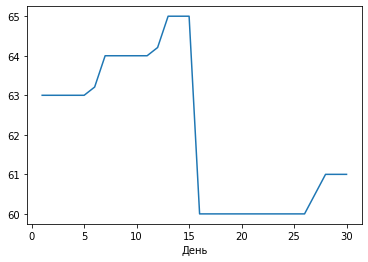

In [58]:
data_month = df_train[(df_train["Канал"] == "ТНТ") & (df_train["Месяц"] == "Сентябрь") & (df_train["Год"] == 2019)].groupby("День")
data_month["searches_wo"].mean().plot()

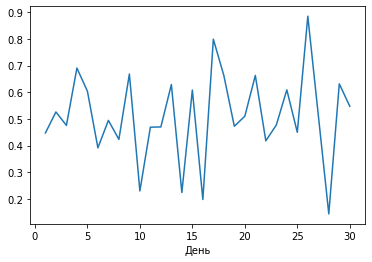

In [59]:
data_month[tvr_18].mean().plot()

In [60]:
np.corrcoef(data_month["searches_wo"].mean(), data_month[tvr_18].mean())

array([[ 1.       , -0.1760495],
       [-0.1760495,  1.       ]])

### 4. Индекс самоизоляции

In [110]:
driver = webdriver.Chrome(executable_path = "/home/egoluback/Documents/NTI/2_stage/ML/2_stage/task2/scrapping/chromedriver")

url_yindex = "https://yandex.ru/company/researches/2020/podomam"

driver.get(url_yindex)

In [111]:
driver.switch_to.frame(driver.find_element_by_tag_name('iframe'))
container_html = driver.find_element_by_xpath("//div[@class = 'svg-container']").get_attribute("innerHTML")

In [146]:
q = BeautifulSoup(container_html)

g_textArr = q.findAll('g', {'class': 'axis--x'})[0].findAll('g', {'class': 'tick'})
g_text = list(map(lambda x: x.getText(), g_textArr))

rect_barArr = q.findAll('rect', {'class': 'bar'})
vals = list(map(lambda x: x['data-val'].split()[2], rect_barArr))

In [147]:
df_index = pd.DataFrame(data = {'date': g_text, 'index': vals}).iloc[: -3]

In [148]:
df_index['date'] = df_index['date'].apply(lambda x: datetime.datetime.strptime(x + ".2020", "%d.%m.%Y"))

In [149]:
df_index

,date,index
0,2020-03-02,0.6
1,2020-03-03,0.5
2,2020-03-04,0.5
3,2020-03-05,0.5
4,2020-03-06,0.5
...,...,...
300,2020-12-27,2.8
301,2020-12-28,1.2
302,2020-12-29,1.1
303,2020-12-30,1.3


In [150]:
days_time = df_train["Дата"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))

days_year = pd.Series(days_time.apply(lambda x: x.year), name = "year")
days_month = pd.Series(days_time.apply(lambda x: x.month), name = "month")
days_day = pd.Series(days_time.apply(lambda x: x.day), name = "day")

days_fullymd = pd.merge(pd.merge(days_year, days_month, right_index = True, left_index = True), days_day, right_index = True, left_index = True)

days_fullymd["lockdown_index"] = np.empty(len(days_fullymd["year"]))
days_fullymd["lockdown_index"][:] = np.nan

df_index["year"] = pd.Series(df_index["date"].apply(lambda x: x.year), name = "year")
df_index["month"] = pd.Series(df_index["date"].apply(lambda x: x.month), name = "month")
df_index["day"] = pd.Series(df_index["date"].apply(lambda x: x.day), name = "day")

days_fullymd, df_index

<ipython-input-150-c8d484649707>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_fullymd["lockdown_index"][:] = np.nan


(       year  month  day  lockdown_index
 0      2018     11    1             NaN
 1      2018     11    1             NaN
 2      2018     11    1             NaN
 3      2018     11    1             NaN
 4      2018     11    1             NaN
 ...     ...    ...  ...             ...
 55795  2020      6    7             NaN
 55796  2020      6    7             NaN
 55797  2020      6    7             NaN
 55798  2020      6    7             NaN
 55799  2020      6    7             NaN
 
 [55800 rows x 4 columns],
           date index  year  month  day
 0   2020-03-02   0.6  2020      3    2
 1   2020-03-03   0.5  2020      3    3
 2   2020-03-04   0.5  2020      3    4
 3   2020-03-05   0.5  2020      3    5
 4   2020-03-06   0.5  2020      3    6
 ..         ...   ...   ...    ...  ...
 300 2020-12-27   2.8  2020     12   27
 301 2020-12-28   1.2  2020     12   28
 302 2020-12-29   1.1  2020     12   29
 303 2020-12-30   1.3  2020     12   30
 304 2020-12-31   2.8  2020     12   31

In [188]:
year = 2020
for monthIndex in range(2, 12):
    index_df_this = df_index[(df_index["year"] == year) & (df_index["month"] == monthIndex + 1)]
    days_this = days_fullymd[(days_fullymd["year"] == year) & (days_fullymd["month"] == monthIndex + 1)]
    if (len(days_this) != 0):
        for day in set(days_this["day"]):
            index_ = index_df_this.loc[index_df_this["day"] == day, "index"]
            if (len(index_) == 0): continue
            days_this.loc[days_this["day"] == day, "lockdown_index"] = list(index_)[0]
    days_fullymd[(days_fullymd["year"] == year) & (days_fullymd["month"] == monthIndex + 1)] = days_this


/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/home/egoluback/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

In [233]:
def to_int(x):
    if (not pd.isnull(x)): return float(x)
    return x

df_train["lockdown_index"] = days_fullymd["lockdown_index"].apply(lambda x: to_int(x))

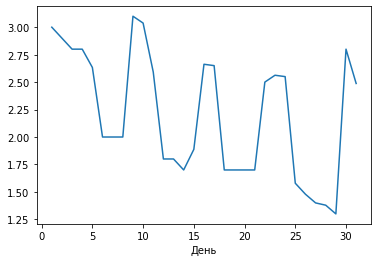

In [243]:
data_month = df_train[(df_train["Канал"] == "ТНТ") & (df_train["Месяц"] == "Май") & (df_train["Год"] == 2020)].groupby("День")
data_month["lockdown_index"].mean().plot()

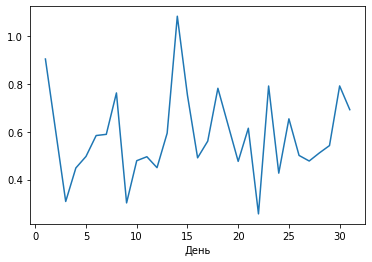

In [244]:
data_month[tvr_18].mean().plot()

In [245]:
np.corrcoef(data_month["lockdown_index"].mean(), data_month[tvr_18].mean())

array([[ 1.      , -0.182046],
       [-0.182046,  1.      ]])

## Выходные дни

In [246]:
holidays = []
date_format = "%Y-%m-%d"

for year in [2018, 2019, 2020]:
    for day in range(1, 9):
        holidays.append(datetime.datetime.strptime("{1}-01-{0}".format(day, year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-02-23".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-03-08".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-05-01".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-05-09".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-06-12".format(year), date_format))
    holidays.append(datetime.datetime.strptime("{0}-11-04".format(year), date_format))

holidays_str = list(map(lambda x: datetime.datetime.strftime(x, date_format), holidays))

In [247]:
df_train["working_day"] = ~np.isin(df_train["day_datetime"], holidays_str)

In [248]:
df_train["working_day"] = ~(df_train["weekday"] >= 5)

In [249]:
df_train["working_day"].value_counts()

True     39815
False    15985
Name: working_day, dtype: int64

In [87]:
df_train[~df_train["working_day"]][tvr_18].mean(), df_train[df_train["working_day"]][tvr_18].mean()

(1.2891829840475473, 1.2825620997111615)

In [256]:
data_month = df_train[(df_train["Канал"] == "ТНТ")].groupby("День")

np.corrcoef(data_month["working_day"].mean(), data_month[tvr_18].mean())

array([[ 1.        , -0.42791007],
       [-0.42791007,  1.        ]])

# Идеи:
<b> погода </b> - есть <br /> 
статистика поисковых запросов - есть <br /> 
курс валюты - в процессе <br /> 
s&p 500 yahoo finance - в процессе <br /> 
индекс самоизоляции - есть